<a href="https://colab.research.google.com/github/Tabook22/ComputerVision/blob/main/imageDetecting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 10.3 MB/s eta 0:00:00


In [3]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/img_5.jpg'

100% 6.23M/6.23M [00:00<00:00, 73.4MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/img_5.jpg: 480x640 5 persons, 2 chairs, 2 tvs, 7 laptops, 1 remote, 91.4ms
Speed: 13.0ms preprocess, 91.4ms inference, 30.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


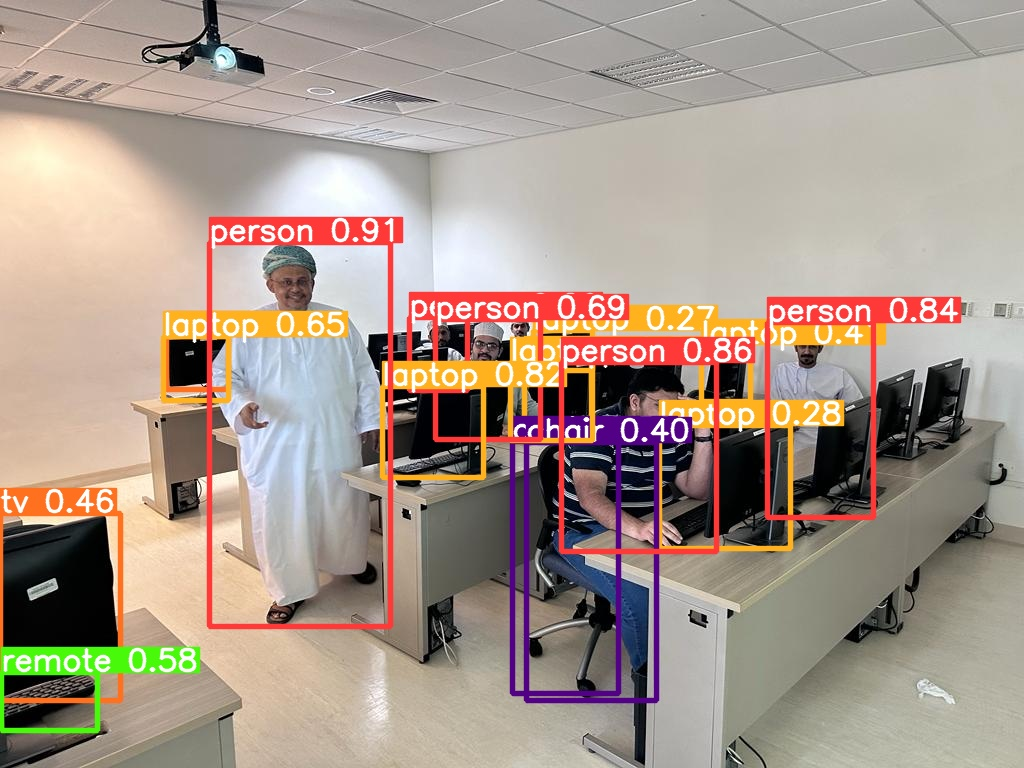

In [6]:
from IPython.display import Image

Image("/content/runs/detect/predict/img_5.jpg", width=700, height=500)

In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EhdTiQVd7IOWFFV6agFK")
project = rf.workspace("dhofaruniversity").project("findnasser")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.196, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to FindNasser-1 in yolov8:: 100%|██████████| 66/66 [00:00<00:00, 5144.38it/s]


In [20]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/FindNasser-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, 

In [22]:
!yolo task=detect mode=predict model=/content/runs/detect/train11/weights/best.pt conf=0.25 source='/content/test_img2.jpg'


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/test_img2.jpg: 640x480 1 Nasser, 98.5ms
Speed: 3.3ms preprocess, 98.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict
